In [ ]:
import numpy as np 
from scipy.integrate import odeint 
from math import *
from matplotlib.pyplot import *
from sympy import symbols, Matrix, nonlinsolve, simplify, solve
from sympy.solvers.inequalities import reduce_rational_inequalities, solve_poly_inequality
from sympy.utilities.lambdify import lambdify


In [ ]:
def phase_portrait(f,x_range,dens):  
    x_range = x_range
    x1_max, x2_max = x_range
    x1_span = np.arange(-1.1*x1_max, 1.1*x1_max, 0.01)
    x2_span = np.arange(-1.1*x2_max, 1.1*x2_max, 0.01)
    x1_grid, x2_grid = np.meshgrid(x1_span, x2_span)
    dx1, dx2 = f([x1_grid, x2_grid], 0)
    strm = streamplot(x1_span, x2_span, dx1, dx2, arrowsize=1.2, density=dens,color=dx2, cmap='winter', linewidth=1, arrowstyle='->')
    colorbar(strm.lines)
    title("Phase Portrait")
    xlim([-x1_max,x1_max])
    ylim([-x2_max,x2_max])
    xlabel("x1")
    ylabel("x2")

# Problem 1


In [ ]:
x = symbols("x_1, x_2")
V_symb = (x[0]**2/(1+x[0]**2)**2) + x[1]**2
print("lyapunov candidate:")
V_symb

lyapunov candidate:


x_1**2/(x_1**2 + 1)**2 + x_2**2

In [ ]:
grad_V = Matrix([V_symb]).jacobian(x)
print("gradiant of lyapunov candidate:")
grad_V

gradiant of lyapunov candidate:


Matrix([[-4*x_1**3/(x_1**2 + 1)**3 + 2*x_1/(x_1**2 + 1)**2, 2*x_2]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


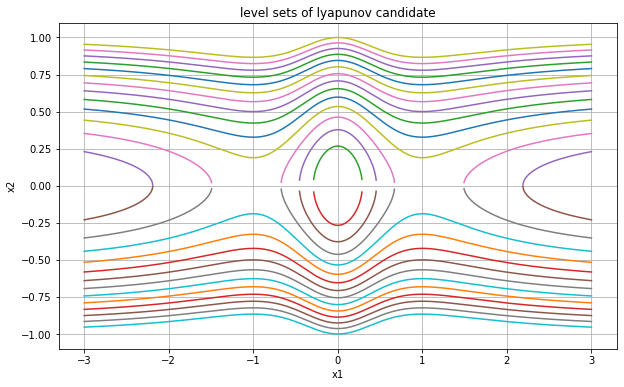

In [ ]:
x2, x22 = [], []
x1 = np.linspace(-3, 3, 1000) 
c = np.linspace(0, 1, 15) 

for i in range(len(c)):
  temp = []
  temp2 = []
  for j in range(len(x1)):
    x = np.sqrt(c[i]-(x1[j]**2/(1+x1[j]**2)**2))
    x_2 = -np.sqrt(c[i]-(x1[j]**2/(1+x1[j]**2)**2))
    temp.append(x)
    temp2.append(x_2)
  x2.append(temp)
  x22.append(temp2)

figure(figsize=(10, 6))

for i in range(len(c)):
  
  plot(x1,x2[i])
  plot(x1,x22[i])

title("level sets of lyapunov candidate")
xlabel("x1")
ylabel("x2")  
grid()
show()

# Problem 2

In [ ]:
x = symbols("x_1, x_2", extended_real=True)
c = symbols("c", extended_real=True, positive = True)
V_symb = x[0]**2 + x[1]**2
print("lyapunov candidate:")
V_symb

lyapunov candidate:


x_1**2 + x_2**2

In [ ]:
grad_V = Matrix([V_symb]).jacobian(x)
print("gradiant of lyapunov candidate:")
grad_V

gradiant of lyapunov candidate:


Matrix([[2*x_1, 2*x_2]])

In [ ]:
f_sym = Matrix([x[0]*(x[0]**2+x[1]**2-c)-4*x[0]*x[1]**2,
                4*x[0]**2*x[1]+x[1]*(x[0]**2+x[1]**2-c)])
dV = simplify(grad_V*f_sym)
dV

Matrix([[-2*c*x_1**2 - 2*c*x_2**2 + 2*x_1**4 + 4*x_1**2*x_2**2 + 2*x_2**4]])

In [ ]:
eq_points = nonlinsolve(f_sym,x)
eq_points

FiniteSet((0, 0), (0, sqrt(c)), (sqrt(c), 0), (0, -sqrt(c)), (-sqrt(c), 0), (-sqrt(c)/2, -I*sqrt(c)/2), (-sqrt(c)/2, I*sqrt(c)/2), (sqrt(c)/2, -I*sqrt(c)/2), (sqrt(c)/2, I*sqrt(c)/2))

In [ ]:
# print(f'The region of attraction is given by:')
# dV_num = lambdify([x,c],dV)
# reduce_rational_inequalities(dV<=0, x)
# solve(np.real(dV)<=0, x)

In [ ]:
# for c = 3
def f(x,t):
  dx1 = x[0]*(x[0]**2+x[1]**2-3)-4*x[0]*x[1]**2
  dx2 = 4*x[0]**2*x[1]+x[1]*(x[0]**2+x[1]**2-3)
  return dx1, dx2

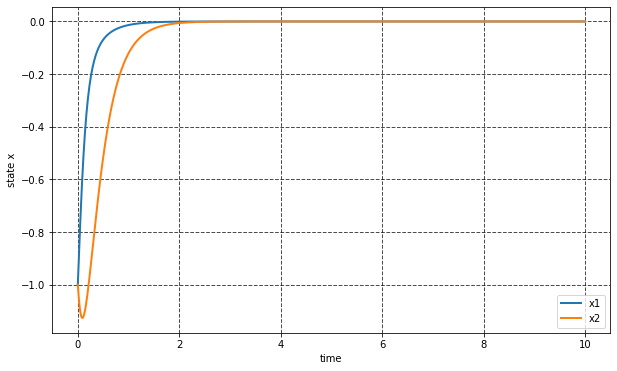

In [ ]:
t0 = 0 
tf = 10 
N = int(1000) 
t = np.linspace(t0, tf, N) 
figure(figsize=(10, 6))

x_0 = [-1,-1]
x_sol = odeint(f,x_0, t)
x1, x2 = x_sol[:,0], x_sol[:,1] 
plot(t , x1, linewidth=2.0) 
plot(t , x2, linewidth=2.0) 

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'state x')
xlabel(r'time')
legend(["x1","x2"])
show() 

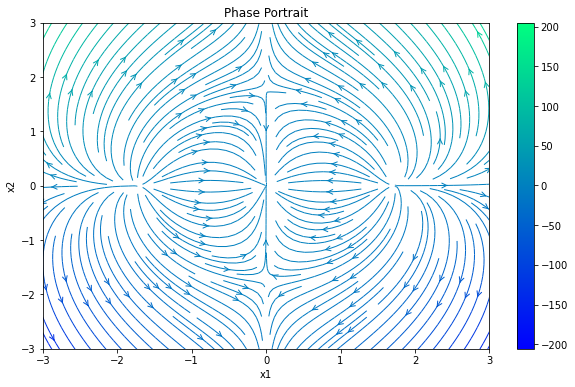

In [ ]:
dens=2
x_range=[3,3]
figure(figsize=(10,6))
phase_portrait(f,x_range,dens)   
show()

# Problem 3

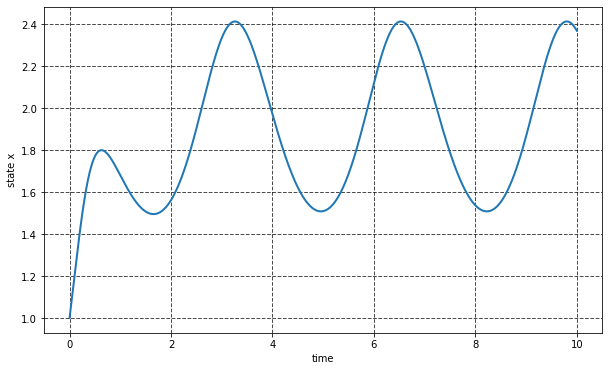

In [ ]:
# controller u
t0 = 0 
tf = 10 
N = int(1000) 
t = np.linspace(t0, tf, N) 
figure(figsize=(10, 6))

H_d = 2
def u(x,t):
  theta, dtheta = x
  # Control
  u = dtheta*(H_d - 1/2*dtheta**2 + np.cos(theta))
  # return dtheta, u - np.sin(theta) - dtheta
  return dtheta, u

x_0 = [1,1]
x_sol = odeint(u,x_0, t)
dtheta, cont = x_sol[:,0], x_sol[:,1] 
# plot(t , x1, linewidth=2.0) 
plot(t , cont, linewidth=2.0) 

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'state x')
xlabel(r'time')
# legend(["x1","x2"])
show() 

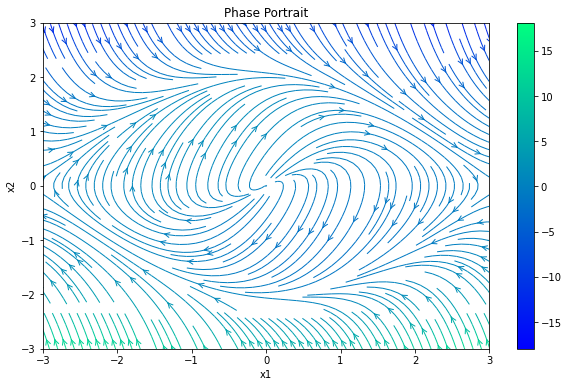

In [ ]:
H_d = 2
def u(x,t):
  theta, dtheta = x
  # Control
  u = dtheta*(H_d - 1/2*dtheta**2 + np.cos(theta))
  return dtheta, u - np.sin(theta) - dtheta

dens=2
x_range=[3,3]
figure(figsize=(10,6))
phase_portrait(u,x_range,dens)   
show()

# Problem 4

In [ ]:
x = symbols('x', real = True)
alpha = symbols('alpha', real = True, positive = True)
V = x**2 /2
print(f'Time derivative of candidate:')

dV = V.diff(x)*(-x+x**3+alpha)
simplify(dV)

Time derivative of candidate:


x*(alpha + x**3 - x)

In [ ]:
# print(f'The region of attraction is given by:')
# reduce_rational_inequalities(dV<=0, x)
# solve(dV<=0, x)


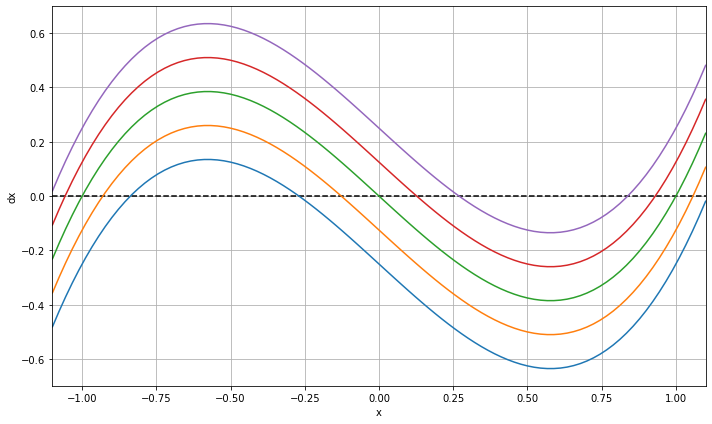

In [ ]:
x_range = [-1.1,1.1]
x = np.linspace(x_range[0], x_range[1], 100)

figure(figsize=(10, 6))
for alpha in np.linspace(-1/4,1/4,5):        
    dx = -x + x**3 + alpha
    plot(x, dx)

xlabel("x")
ylabel("dx")
hlines(0, x_range[0], x_range[1], linestyle='--')
xlim([x_range[0], x_range[1]])
grid(True)
tight_layout()
show()